# Applications of Principal Component Analysis (PCA)

## Objectives

* Use Principal Component Analysis (PCA) to project 2-D data onto its principal axes
* Use PCA for feature space dimensionality reduction
* Relate explained variance to feature importance and noise reduction

# Part I: Using PCA to project 2-D data onto its principal axes

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
# Create dataset
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

# Exercise 1. Visualize the relationship between the two features

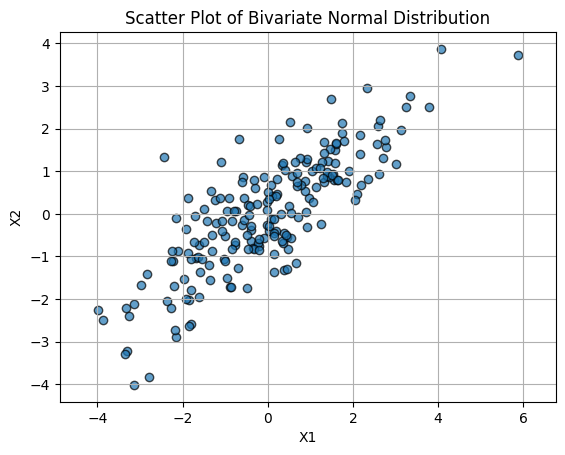

In [3]:
# Scatter plot of the two features
plt.figure()
plt.scatter(X[:, 0], X[:, 1],  edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

# Perform PCA on the dataset

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Get the principal components from the model.

In [5]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [6]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

# Exercise 2. What percentage of the variance in the data is explained by the first principal component?

* You can see that the first component explains over 90% of the variance in the data, while the second explains about 9%.

# Display the results

In [7]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

In [8]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

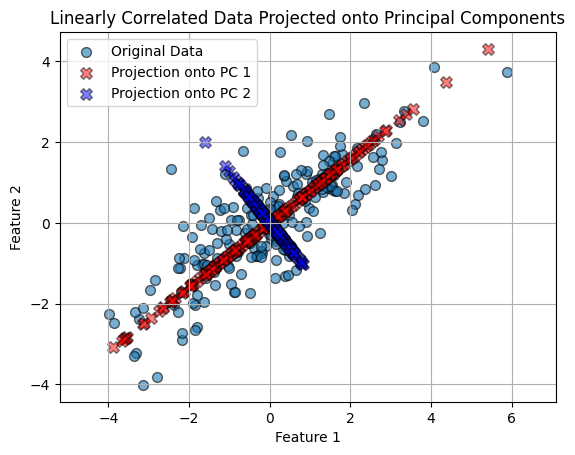

In [9]:
# Plot original data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()